In [3]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from ionoptics import geometry as geo
from ionoptics import beamline as bl
from ionoptics import bmad

In [1]:
# beamsize
##JULIC
### 1 sigma x = 6 mm
### 1 sigma y = 9 mm
### brho = 0.98 Tm

##HBS LINAC
### diameter ~ 10 mm (6 sigma)
### 1 sigma = 1.5 mm
### brho = 1.23 Tm

sigma_x = 1.99e-3
brho = 1.23

## quadrupole position evaluation

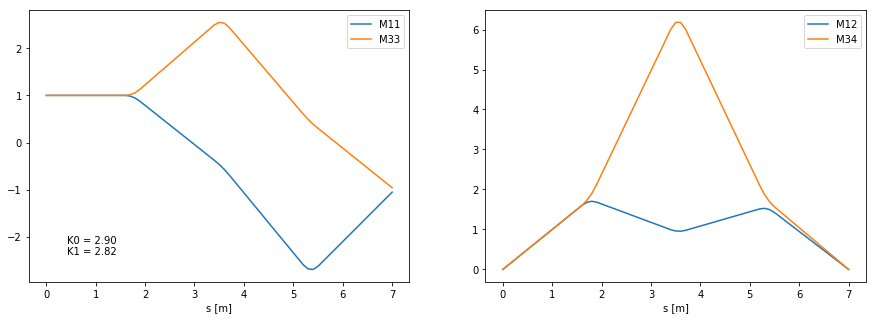

total length:  7.1


In [4]:
l = 1.6 # from object to 1st q
L = 0.3 # q thickness
d = 1.5 # dist. betw. q's

k0,k1 = bl.opt_trip(l,L,d,[2,3],config='FDF')

lengths = [l,L,d,L,d,L,l]
elements = [bl.drift,partial(bl.qf, k=k0),bl.drift,partial(bl.qdf, k=k1),bl.drift,partial(bl.qf, k=k0),bl.drift]

axes = bl.plot_M_vs_s(elements,lengths,figsize = (15,5))

axes[0].text(0.1,0.1,'K0 = {:.2f}\nK1 = {:.2f}'.format(k0,k1),transform=axes[0].transAxes)

#PATH_TO_DATA = '../../Multiplexer/Plots/'
#FILENAME = 'QT_eval-1Kicker-{}_{}_{}'.format(l,d,L)
#plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900)

plt.show()

print('total length: ', round(2*l+2*d+3*L,2))

### bmad cross check

xmax @  start: 0.008794187512927744
xrms @  start: 0.002270840286715482
xprms @  start: 0.0011186405353278265


xmax @  end: 0.007402022547663851
xrms @  end: 0.0021562252387944034


ymax @  start: 0.008324915486026298
yrms @  start: 0.002270840286715489


ymax @  end: 0.00795081266537822
yrms @  end: 0.0023784340126461975


particle loss/%: 0.0


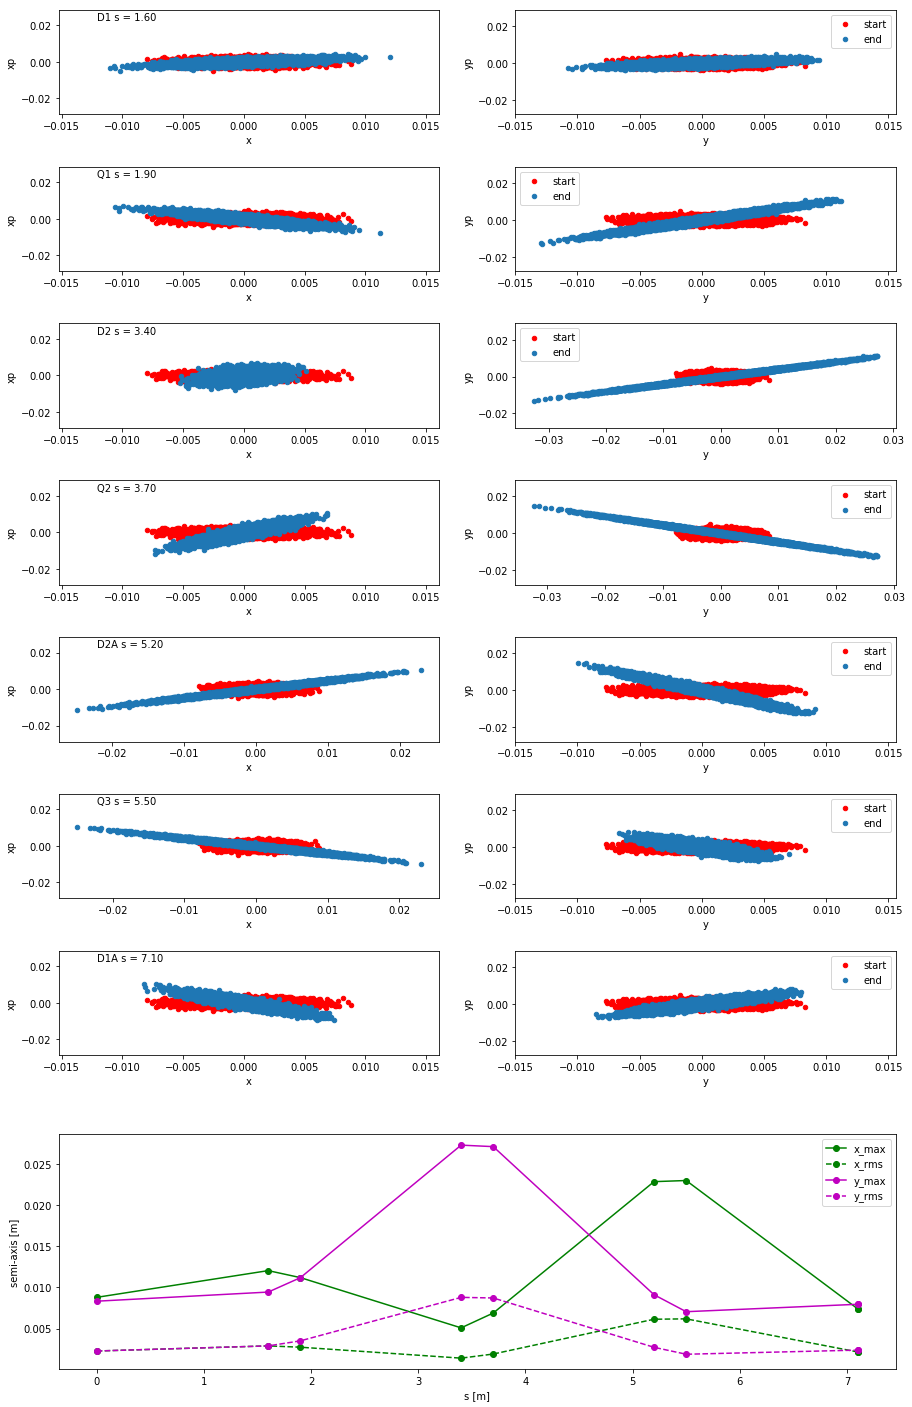

In [18]:
df = bmad.txt_to_df('../../Bmad/Playground/production/bin/','tracking_ele.txt')
bmad.plot_phase_space(df,figsize=(15,25))

PATH_TO_DATA = '../../Multiplexer/Plots/'
FILENAME = 'pure_tr_FDF-{}_{}_{}_sigmax{}'.format(l,d,L,sigma_x)
plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900)

plt.show()

## kick-septum angle evaluation - 1 kicker setup

In [5]:
## beam parameters
Thet_init = 0

## distances
l_object = 0.2 # 1st q to kicker
l_kick = 1
l_sept = 1

lkq = d-l_kick-l_object
l_max = d + L + lkq # d: from q to q
#l_max = 3 # manually set / w/o qs
## vertical distances
x_init = 0

# at septum
septum = 5e-3
x_sept = 4*sigma_x+septum
# at max prop
x_at_max_prop = 0.5
x_add = x_at_max_prop-x_sept

sept_type = 'DC'

## iteration

start_kick = 0.001 # smallest kick-angle
step_kick = 0.001 # step size kick-angle

list_perm = np.linspace(0,1,1001) # range of septum angles

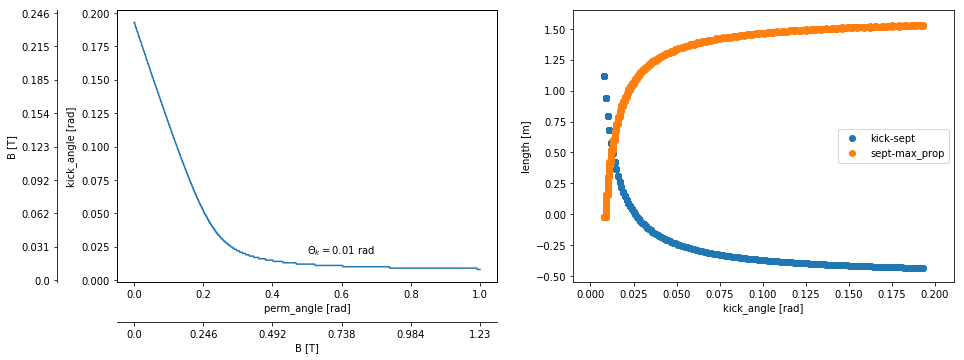

2.1


In [6]:
ax,data= geo.plot_comb_kick_sept(x_sept,
                                 x_add,
                                 x_init,
                                 Thet_init,
                                 l_kick,
                                 l_sept,
                                 sept_type,
                                 start_kick,
                                 step_kick,
                                 list_perm,
                                 l_max,
                                 brho=brho,
                                 figsize = (15,5)
                                )


#PATH_TO_DATA = '../../Multiplexer/Plots/'
#FILENAME = 'ang_eval-1Kicker-{}_{}_{}_simgax{}'.format(l_max,x_at_max_prop,sept_type,sigma_x)
#plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900, bbox_inches="tight")

plt.show()
print(l_max)

In [7]:
kick_d = data[0][0.8]

dks = [d[1] for d in data[1] if d[0] == kick_d]
dks_av = sum(dks)/len(dks)
# kicker-septum


dsf = [d[1] for d in data[2] if d[0] == kick_d]
dsf_av = sum(dsf)/len(dsf)
# septum - final

(kick_d,dks_av,dsf_av,dks_av+dsf_av,l_max-l_sept)

(0.009, 0.9400126901199163, 0.0627203074967374, 1.0027329976166537, 1.1)

## reduced kicker strength by quadrupole

In [14]:
kick_d*dks_av+l_kick*kick_d/2

0.012960114211079246

In [15]:
kick_d*lkq+l_kick*kick_d/2

0.0072

In [13]:
reduced = kick_d - 1e-3

if (dks_av-lkq-L)>=0:
    total_defl,new_angle = geo.quad_defl(k1,0.3,reduced,l_kick,lkq,dks_av-lkq-L)
    if total_defl >= (kick_d*dks_av+l_kick*kick_d/2):
        print('kicker-quad:', lkq)
        print('quad-septum:', dks_av-lkq-L)
        print(total_defl)
    print(new_angle-kick_d)
else:
    print('not working!:', dks_av-lkq-L)

kicker-quad: 0.3
quad-septum: 0.34001269011991636
0.012972548441994013
0.004413016794290724


## electric deflection

In [2]:
def E_field(Theta,l,Brho,beta):
    '''return: E-field in MV/m'''
    E = Theta*beta*3e8*Brho/l
    
    return E/1e6

In [3]:
E_field(reduced,1,brho,0.3)

NameError: name 'brho' is not defined

In [21]:
#TODO adapt speed of particles for different brho for electric field calculation. 
# find a prototype setup with exb kicker with JULIC beam size

In [22]:
E_field(100e-3,1,brho,0.36)

13.284

-2.6945332932749166
1.7042716040354198
2.550800682937926
6.178984894153813


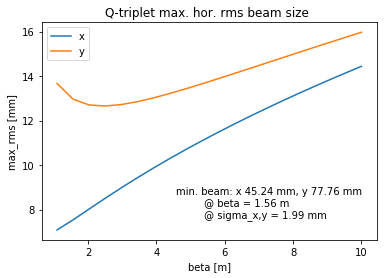

45.244628678202716
77.75937138973688
1.562370493162039
1.9920896196284894
75.9361877590666


In [22]:
eps_LINAC = 2.54 # mm mrad
dia_LINAC = 10 # mm (6 sigma)

beta_init = (dia_LINAC/6)**2/eps_LINAC # m

beta = np.linspace(beta_init,10, 20) # m

sigma_X = np.sqrt(eps_LINAC*beta)
sigma_Xp = np.sqrt(eps_LINAC/beta)

sigma_Y = np.sqrt(eps_LINAC*beta)
sigma_Yp = np.sqrt(eps_LINAC/beta)

Ms = bl.Mplot(elements,lengths)

max_rms_x = abs(max(Ms[1][0], key = abs))*sigma_X+abs(max(Ms[1][1], key = abs))*sigma_Xp
max_rms_y = abs(max(Ms[2][0], key = abs))*sigma_Y+abs(max(Ms[2][1], key = abs))*sigma_Yp

squares = np.sqrt(max_rms_x**2+max_rms_y**2)

print(max(Ms[1][0], key = abs))
print(max(Ms[1][1], key = abs))

print(max(Ms[2][0], key = abs))
print(max(Ms[2][1], key = abs))

np.asarray(Ms[2][0]).argmin()

plt.plot(beta,max_rms_x)
plt.plot(beta,max_rms_y)
plt.legend(['x','y'])

plt.xlabel('beta [m]')
plt.ylabel('max_rms [mm]')
plt.text(0.40,0.1,
         '''min. beam: x {:.2f} mm, y {:.2f} mm  
         @ beta = {:.2f} m 
         @ sigma_x,y = {:.2f} mm'''.format(max_rms_x[squares.argmin()]*6,
                                         max_rms_y[squares.argmin()]*6,
                                         beta[squares.argmin()],
                                         sigma_X[squares.argmin()]),
         transform=plt.gca().transAxes)

plt.title('Q-triplet max. hor. rms beam size ')

PATH_TO_DATA = '../../Multiplexer/Plots/'
FILENAME = 'Twiss_Linac_QT_FDF_eval-{:.2f}'.format(eps_LINAC)
plt.savefig(PATH_TO_DATA + FILENAME, format = 'png', dpi=900)

plt.show()

squares = np.sqrt(max_rms_x**2+max_rms_y**2)


print(max_rms_x[squares.argmin()]*6)
print(max_rms_y[squares.argmin()]*6)
print(beta[squares.argmin()])
print(sigma_X[squares.argmin()])

print(max_rms_y[3]*6)